### Problem Statement
Analyze the data provided by Netflix and generate insights that could help Netflix deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/USER/Downloads/netflix.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.shape 

(8807, 12)

In [5]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

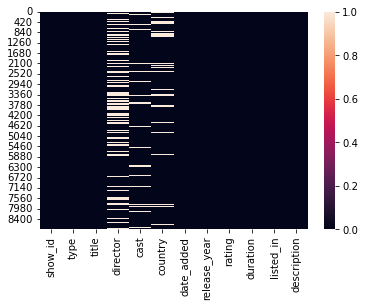

In [7]:
sns.heatmap(df.isnull()) #In the heatmap white colour shows the missing values

In [8]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## Fill in Missing Values and Adjust Data Types

In [9]:
df = df.fillna({'rating':'unavailable', 'director':'unavailable', 'cast':'unavailable', 'country':'unavailable'})

In [10]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### The missing values of duration are all movies by Louis C.K. Here it appears the actual duration was input into rating column, so the solution is to move the rating data into duration and fill the rating values with unavailable as other null values 

In [11]:
df[df['director']=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### Check to make sure there is no other content with the same director to avoid accidental overwirting

In [12]:
df.loc[df['director']=='Louis C.K.', 'duration'] = df['rating']
df[df['director']=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [13]:
df.loc[df['director']=='Louis C.K.', 'rating']='unavailable'
df[df['director']=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


In [14]:
df['date_added']=pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Numerical and Visual Analysis

In [15]:
df['date_added'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_added, dtype: int64

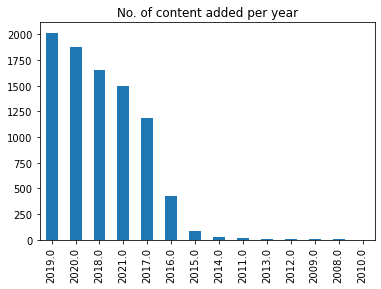

In [16]:
df['date_added'].dt.year.value_counts().plot(kind='bar') 
plt.title("No. of content added per year")
plt.show()

#### We can infer from the above diagram, In the year 2019, highest nos. of content was added on netflix so with the trend more content can be added to keep the people engaged

In [17]:
df.groupby('type').type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

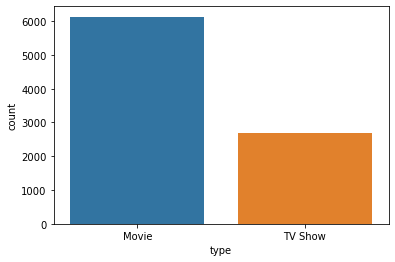

In [18]:
sns.countplot(data= df, x='type')

#### On Netflix there are more number of Movies compared to TV shows

In [19]:
df['country'].value_counts().head(10)

United States     2818
India              972
unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

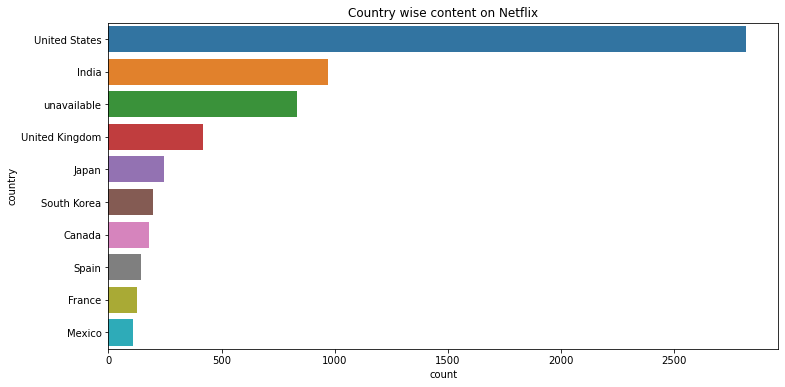

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10], data = df )
plt.title("Country wise content on Netflix")
plt.show()

#### We can see united states is leading with highest no. of content followed by India

In [21]:
df['day_added']= df.date_added.dt.day_name()
df['year_added']=df.date_added.dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021.0
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021.0
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021.0
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021.0


In [22]:
df['day_added'].value_counts()

Friday       2498
Thursday     1396
Wednesday    1288
Tuesday      1197
Monday        851
Saturday      816
Sunday        751
Name: day_added, dtype: int64

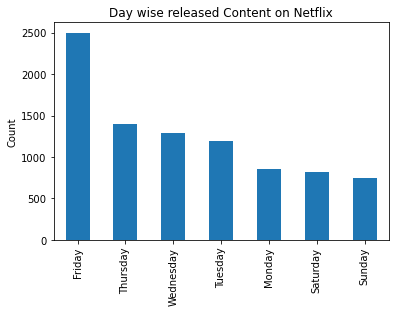

In [23]:
df['day_added'].value_counts().plot(kind='bar')
plt.title("Day wise released Content on Netflix")
plt.ylabel("Count")
plt.show()

#### From the above insight, it can be said that friday is working well for Netflix

In [24]:
df[['minutes', 'unit']] = df.duration.str.split(' ', expand = True)
df['minutes']= df['minutes'].astype('int64')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021.0,90,min
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021.0,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021.0,1,Season
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021.0,1,Season
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021.0,2,Seasons


In [25]:
df_Movies = df[df['type']=='Movie']
df_TV_Show = df[df['type']=='TV Show']


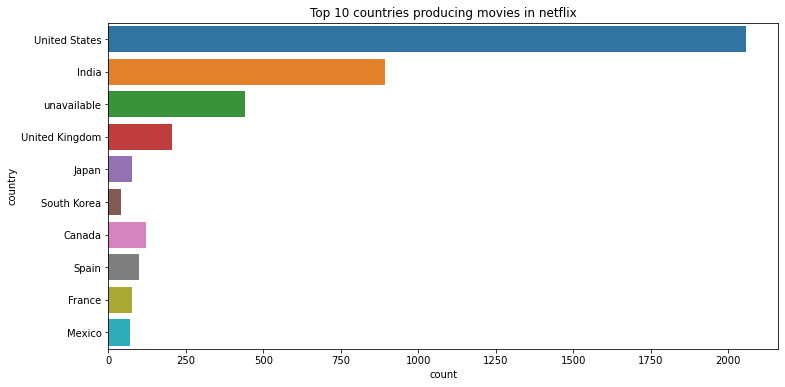

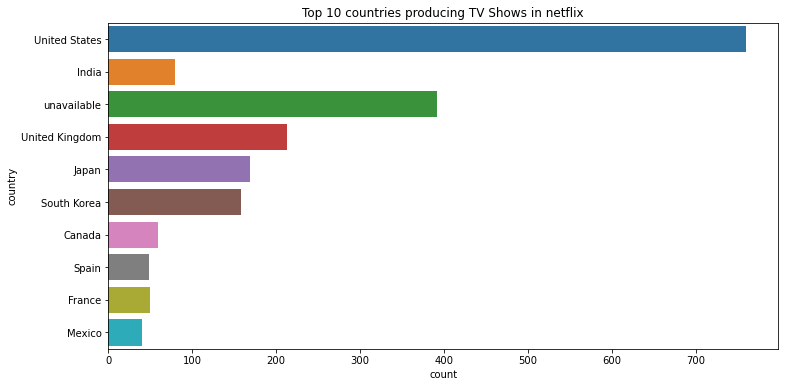

In [26]:
plt.figure(figsize = (12,6))
sns.countplot(y='country', order = df['country'].value_counts().index[0:10], data = df_Movies)
plt.title("Top 10 countries producing movies in netflix")
plt.show()

plt.figure(figsize = (12,6))
sns.countplot(y='country', order = df['country'].value_counts().index[0:10], data = df_TV_Show)
plt.title("Top 10 countries producing TV Shows in netflix")
plt.show()

#### United states is producing highest no. of movies in Netflix followed by India. But in TV shows, United Kingdom is ahead of India.

In [27]:
round(df_Movies.minutes.mean(),2)

99.56

#### The Avg Runtime of movies on Netflix is 100 mins approx.

In [28]:
df_Movies.groupby(['year_added'])["minutes"].mean()

year_added
2008.0     81.000000
2009.0     66.500000
2010.0     84.000000
2011.0     93.461538
2012.0     62.000000
2013.0     83.500000
2014.0     77.000000
2015.0     83.571429
2016.0     83.545455
2017.0     95.654350
2018.0    101.739693
2019.0     99.923455
2020.0    101.585670
2021.0    102.839879
Name: minutes, dtype: float64

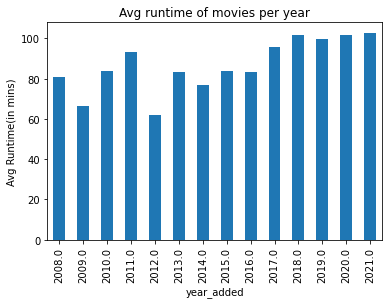

In [29]:
df_Movies.groupby(['year_added'])["minutes"].mean().plot(kind='bar')
plt.title("Avg runtime of movies per year")
plt.ylabel("Avg Runtime(in mins)")
plt.show()

#### We can see the avg run time increasing with years so we can say if it's working fine the avg run time should be maintained at 100 minutes

In [30]:
df_Movies.country.value_counts().head(10)

United States     2058
India              893
unavailable        440
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Name: country, dtype: int64

#### From the above we can see 893 movies has been released in india by netflix till 2021

In [31]:
df['year_added'] = df.date_added.dt.year

In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021.0,90,min
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021.0,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021.0,1,Season
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021.0,1,Season
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021.0,2,Seasons


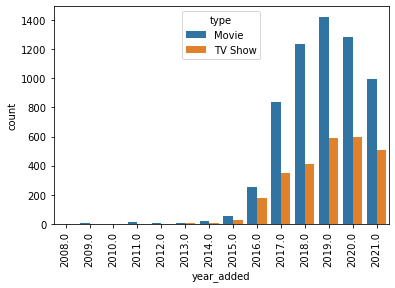

In [33]:
sns.countplot(data= df, x = 'year_added', hue = 'type')
plt.xticks(rotation=90)
plt.show()

#### Netflix has balance approach on adding the tv shows and movies on the platform. But in the last 2-3 years the TV shows are gaining traction.

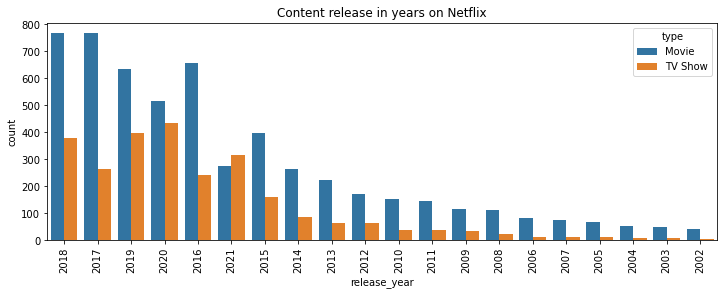

In [34]:
plt.figure(figsize=(12,4))
sns.countplot(data= df, x = 'release_year', order = df['release_year'].value_counts().index[0:20], hue = 'type')
plt.title("Content release in years on Netflix")
plt.xticks(rotation=90)
plt.show()

#### Above analysis says that  more and more new movies and TV shows are getting released every year. And, all new content is getting added to Netflix

In [35]:
df.rating.value_counts().head(10)

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

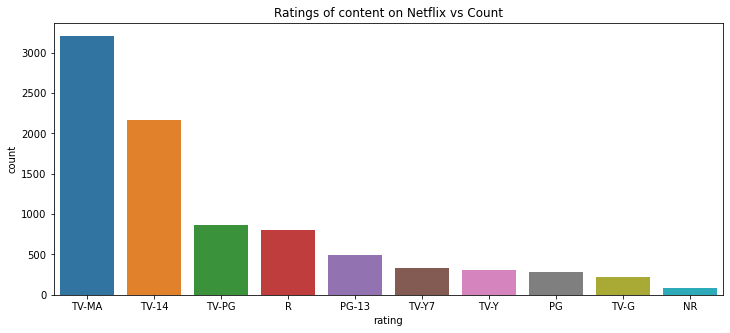

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(x = 'rating', order = df.rating.value_counts().index[0:10], data = df)
plt.title("Ratings of content on Netflix vs Count")
plt.show()

#### Most of the shows has TV-MA and TV-14 ratings.

## Unnesting of Data

In [37]:
constraint = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new=pd.DataFrame(constraint,index=df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new

,title,level_1,0
0,Dick Johnson Is Dead,0,unavailable
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [38]:
df_new = df_new[['title', 0]]
df_new.columns= ['title', 'cast']
df_new

,title,cast
0,Dick Johnson Is Dead,unavailable
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [39]:
df_new[df_new['cast']=='Rupa Bhimani']  #Movies having Rupa Bhimani in cast

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani
3386,Chhota Bheem & Ganesh,Rupa Bhimani
3393,Chhota Bheem & Krishna: Mayanagari,Rupa Bhimani
3400,Chhota Bheem & Krishna: Pataliputra- City of t...,Rupa Bhimani
3407,Chhota Bheem And The Broken Amulet,Rupa Bhimani
3414,Chhota Bheem And The Crown of Valhalla,Rupa Bhimani
3421,Chhota Bheem and the Incan Adventure,Rupa Bhimani


In [40]:
df['director'].apply(lambda x: str(x).split(', ')).tolist()
constraint2=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2)
df_new2.reset_index(inplace=True)
df_new2=df_new2[['title',0]]
df_new2.columns=['title','director']
df_new2

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,unavailable
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,unavailable
4,Kota Factory,unavailable
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,unavailable
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [41]:
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3)
df_new3.reset_index(inplace=True)
df_new3=df_new3[['title',0]]
df_new3.columns=['title','listed_in']
df_new3

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [42]:
df2 = df_new.merge(df_new2, how='left', on='title')
df3 = df2.merge(df_new3, how="left", on='title')
df = df.merge(df3,how='left', on='title')
df.drop(['cast_x', 'director_x','listed_in_x'], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161216 entries, 0 to 161215
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       161216 non-null  object        
 1   type          161216 non-null  object        
 2   title         161216 non-null  object        
 3   country       161216 non-null  object        
 4   date_added    161058 non-null  datetime64[ns]
 5   release_year  161216 non-null  int64         
 6   rating        161216 non-null  object        
 7   duration      161216 non-null  object        
 8   description   161216 non-null  object        
 9   day_added     161058 non-null  object        
 10  year_added    161058 non-null  float64       
 11  minutes       161216 non-null  int64         
 12  unit          161216 non-null  object        
 13  cast_y        161216 non-null  object        
 14  director_y    161216 non-null  object        
 15  listed_in_y   161

In [43]:
df.rename(columns= {'cast_y':'cast', 'director_y':'director', 'listed_in_y':'listed_in'}, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161216 entries, 0 to 161215
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       161216 non-null  object        
 1   type          161216 non-null  object        
 2   title         161216 non-null  object        
 3   country       161216 non-null  object        
 4   date_added    161058 non-null  datetime64[ns]
 5   release_year  161216 non-null  int64         
 6   rating        161216 non-null  object        
 7   duration      161216 non-null  object        
 8   description   161216 non-null  object        
 9   day_added     161058 non-null  object        
 10  year_added    161058 non-null  float64       
 11  minutes       161216 non-null  int64         
 12  unit          161216 non-null  object        
 13  cast          161216 non-null  object        
 14  director      161216 non-null  object        
 15  listed_in     161

## Numerical and Visual Analysis

In [44]:
df.nunique()

show_id          8807
type                2
title            8807
country           749
date_added       1714
release_year       74
rating             15
duration          220
description      8775
day_added           7
year_added         14
minutes           210
unit                3
cast            36440
director         4994
listed_in          42
dtype: int64

In [45]:
df_actdir = df.groupby(["cast", 'director'])['title'].nunique().reset_index().sort_values(by='title', ascending=False).head(20)
df_actdir = pd.DataFrame(df_actdir)
df_actdir.reset_index(inplace=True)
df_actdir

,index,cast,director,title
0,62550,unavailable,unavailable,352
1,55848,Takahiro Sakurai,unavailable,24
2,28814,Julie Tejwani,Rajiv Chilaka,19
3,46753,Rajesh Kava,Rajiv Chilaka,19
4,49634,Rupa Bhimani,Rajiv Chilaka,18
5,26043,Jigna Bhardwaj,Rajiv Chilaka,18
6,61318,Yuki Kaji,unavailable,18
7,12530,Daisuke Ono,unavailable,16
8,58954,Vatsal Dubey,Rajiv Chilaka,16
9,59502,Vincent Tong,unavailable,16


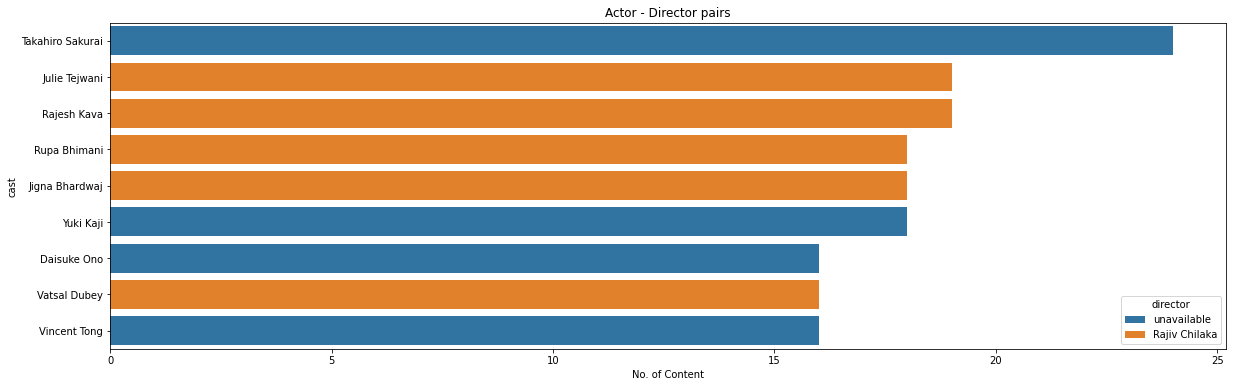

In [46]:
plt.figure(figsize = (20,6))
 #Ignoring the unavailable cast and director. Because it's behaving as an outlier.
sns.barplot(y= 'cast', x= 'title', data = df_actdir[1:10], hue = 'director', dodge=False)
plt.title("Actor - Director pairs")
plt.xlabel("No. of Content")
plt.show()

#### From the above data insight we can say that the most popular actor, director pair are (Julie Tejwani,Rajesh Kava) with Rajiv Chilaka. 

In [47]:
df.groupby('director')["title"].nunique().sort_values(ascending=False)

director
unavailable                2634
Rajiv Chilaka                22
Jan Suter                    21
Raúl Campos                  19
Suhas Kadav                  16
                           ... 
Brandon Camp                  1
Juan Antin                    1
Juan Antonio de la Riva       1
Juan Camilo Pinzon            1
María Jose Cuevas             1
Name: title, Length: 4994, dtype: int64

####  Rajiv Chilaka is the most popular director.

In [48]:
df.groupby('listed_in')["title"].nunique().sort_values(ascending=False)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

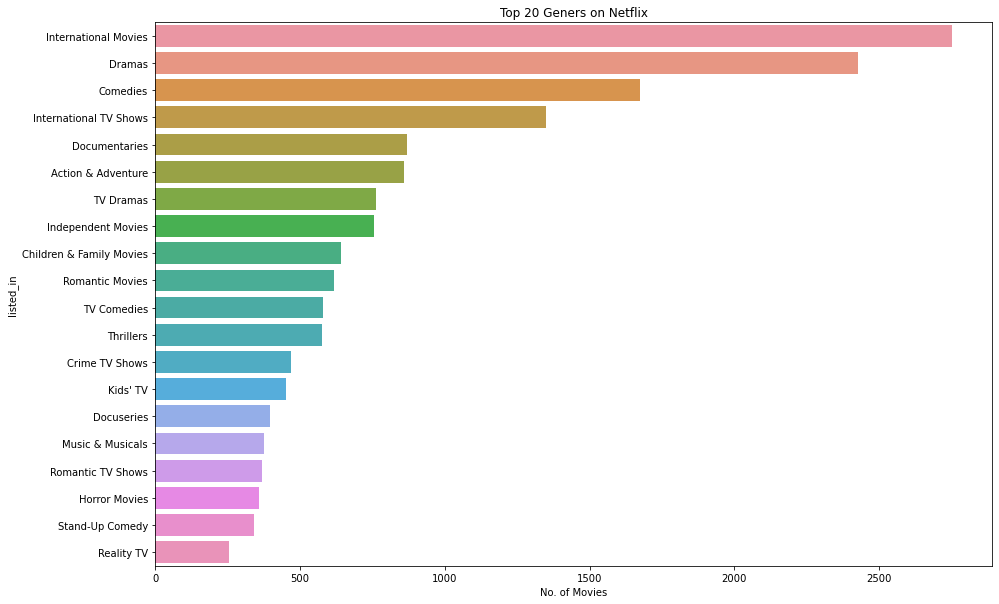

In [49]:
plt.figure(figsize=(15,10))
df_geners= df.groupby('listed_in')["title"].nunique().sort_values(ascending=False).reset_index().head(20)
sns.barplot(data = df_geners, y='listed_in', x = 'title')
plt.xlabel("No. of Movies")
plt.title("Top 20 Geners on Netflix")
plt.show()

#### From the above analysis, it can be said that international movies, dramas and comedies are doing well for Netflix so more content can be added in these geners.

In [50]:
df.groupby('cast')["title"].nunique().sort_values(ascending=False).head(10)


cast
unavailable         825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: title, dtype: int64

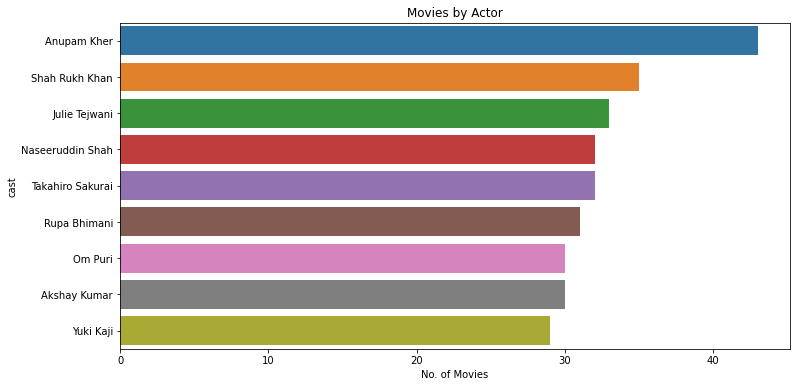

In [51]:
plt.figure(figsize = (12,6))
df_actor = df.groupby('cast')["title"].nunique().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data = df_actor[1:11], y='cast', x = 'title')
plt.xlabel("No. of Movies")
plt.title("Movies by Actor")
plt.show()

#### Anupam kher has the highest number of movies on Netflix followed by Shah Rukh Khan.